<a href="https://colab.research.google.com/github/intuition-explorer/ML-Algorithms/blob/main/SpectralClustering_MiceTrisomydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Template for spectral clustering
import numpy as np
from scipy.spatial.distance import cdist
from scipy.linalg import eigh
from sklearn.cluster import KMeans

# 1. Data: X = ...
# 2. Similarity matrix W:
#    W = np.exp(-cdist(X, X)**2 / (2*sigma**2))
# 3. Degree matrix D:
#    D = np.diag(W.sum(axis=1))
# 4. Laplacian L:
#    L = D - W
# 5. Eigenvectors:
#    vals, vecs = eigh(L)
#    Fiedler = vecs[:, 1]
# 6. Clustering:
#    labels = (Fiedler > 0).astype(int)  # 2 clusters


In [ ]:
#Pipeline: Clarify goal, success metrics and real world constraints-latency, interpretability, fairness
#1 Data preprocessing:clean missing values, encode categorical, normalize features
#2 Train, validate, test. Startified per classification, there was kfolds something, this i need to work on and then actually test after validate*
#3 Exploratory Clustering: kmeans + spectral into visualize tSNE and UMAP, then check if correspond to meaningful groups
#4 Feature Engineering** add cluster ID or membership probability as features
#5 Classification: Train classifier:Logistic, then RF and GB, compare predictivity, (add SVM if want geometry)
#6 Evaluation: Precision, Recall, F1:Review Confusion Matrix, Support? + **ROC/AUC for probability based models-idk this at all
#7 Pipeline packaging: reproducible workflow with scikit learn??

In [ ]:
'''
The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex.
There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per
sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a
total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic.
According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug
memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)
'''

In [ ]:
#72 mice, measured each 15 times (the nuclear fraction of the cortex) =1080
#77 proteins considered
#Says 1080 samples/rows but will be correlated, actually 72 samples-can take average and keep variance/SD

In [ ]:
#Import and clean data, then write something to look for simliarities between rows and take average of 15 most similar, keeping variance

In [ ]:
from google.colab import files #from module: google.colab import files function, then instantiate the fxn
files.upload() #this saves file to Data_Cortex_Nuclear (2).xls, this is classifed as dict but is an excel file

Saving Data_Cortex_Nuclear.xls to Data_Cortex_Nuclear.xls


{'Data_Cortex_Nuclear.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x19\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00O\x0c\x00\x00\x01\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00B\x00\x00\x00\xc3\x00\x00\x00D\x01\x00\x00\xc5\x01\x00\x00F\x02\x00\x00\xc7\x02\x00\x00H\x03\x00\x00\xc9\x03\x00\x00J\x04\x00\x00\xcb\x04\x00\x00L\x05\x00\x00\xcd\x05\x00\x00N\x06\x00\x00\xcf\x06\x00\x00P\x07\x00\x00\xd1\x07\x00\x00R\x08\x00\x00\xd3\x08\x00\x00T\t\x00\x00\xd5\t\x00\x00V\n\x00\x00\xd7\n\x00\x00X\x0b\x00\x00\xd9\x0b\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x

In [ ]:
import pandas as pd
data = pd.read_excel('Data_Cortex_Nuclear.xls') #pd.read is a method _excel not _csv as file type is xls
print(data.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

In [ ]:
data.info() #get idea of columns=features, datatype in columns + missing data, rows(count only)=1080 samples
#Clearly missing data, 1-77 are proteins all floats
# 0 is mouseID object, none missing, I think i can omit this and just use index
# 78-81  Genotype, Treatment, Behaviour, class, none missing. I can use this if target wanted but I'm interested in clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
X = data.copy()
X = X.drop(axis=1, columns=['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'])
X.shape #(77 columns now)
#X.describe() #The issue as I can see as well as from from X.info() is that there's missing (protein) data in columns
#Options are find lowest number and delete- but lose data
#Fill in missing data- obvious is mean, plethora of ways- but this will conflate
#Given domain knowledge, if there's missing protein data I can assume that it's not present in the mouse esp since did 15 reps and some are missing way more than 3
#Conclusion: Set missing to 0- if value =None, Look into specific columns

(1080, 77)

In [ ]:
print(X['BCL2_N']) #It has NaN, still shows length of 1080, I picked col with most missing
print(X['pCFOS_N'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1075   NaN
1076   NaN
1077   NaN
1078   NaN
1079   NaN
Name: BCL2_N, Length: 1080, dtype: float64
0       0.108336
1       0.104315
2       0.106219
3       0.111262
4       0.110694
          ...   
1075    0.183324
1076    0.175674
1077    0.158296
1078    0.196296
1079    0.187556
Name: pCFOS_N, Length: 1080, dtype: float64


In [ ]:
X = X.fillna(value=0) #looked up in documentation: DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=<no_default>)
print(X['BCL2_N'].head(50))
print(X['pCFOS_N'].head(50))

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.178604
16    0.143588
17    0.132887
18    0.182391
19    0.163775
20    0.143073
21    0.202294
22    0.178342
23    0.160438
24    0.198961
25    0.170033
26    0.168637
27    0.198299
28    0.161657
29    0.151302
30    0.120835
31    0.130462
32    0.118851
33    0.116218
34    0.142739
35    0.135323
36    0.121397
37    0.124847
38    0.136110
39    0.146439
40    0.146773
41    0.162775
42    0.160729
43    0.155856
44    0.158693
45    0.133978
46    0.142559
47    0.146339
48    0.126451
49    0.147549
Name: BCL2_N, dtype: float64
0     0.108336
1     0.104315
2     0.106219
3     0.111262
4     0.110694
5     0.109446
6     0.111483
7     0.113080
8     0.105490
9     0.116906
10    0.131254
11    0.125266
12    0.126934
13    0.125018
14    0.125

In [ ]:
print(X.head(50)) #All seems good now i have to think, what do these nums represent=protein concentration?
#Remember 15 replicates per mouse brain here, I should average relevant rows. Originally was thinking if data needs to be normalized but this makes sense to do
#Reduces dimensionality, and just better to do as a scientist. SO i need to look for correlations b/w rows

    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0   0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1   0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2   0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3   0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4   0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5   0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6   0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7   0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8   0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9   0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12  0.364873

In [ ]:
corr = X.corr()
print(corr) #This is correlation of columns only. My instinct is to Transpose matrix then run
XT= X.transpose()
print(XT)

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.959255  0.367778  0.306508  0.335411 -0.147453   
ITSN1_N    0.959255  1.000000  0.473075  0.437863  0.440253 -0.104235   
BDNF_N     0.367778  0.473075  1.000000  0.826391  0.762199  0.379601   
NR1_N      0.306508  0.437863  0.826391  1.000000  0.876241  0.284832   
NR2A_N     0.335411  0.440253  0.762199  0.876241  1.000000  0.163371   
...             ...       ...       ...       ...       ...       ...   
SYP_N     -0.045088  0.044856  0.433283  0.454020  0.395922  0.244467   
H3AcK18_N -0.227613 -0.191353 -0.036878 -0.086095 -0.178156  0.126507   
EGR1_N    -0.043643 -0.025779 -0.060561 -0.028069 -0.071078  0.045728   
H3MeK4_N  -0.225390 -0.225843 -0.186493 -0.196479 -0.275716 -0.092510   
CaNA_N     0.472178  0.510772  0.241898  0.187222  0.178642 -0.234543   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N  -0.058022  -0.164829  0.073716  0.

In [ ]:
print(XT.corr()) #I want to find 15 most correlated rows, thinking to numpy then can take mean of 15 but first have to select them
#Issue is in repeats there can be human error so maybe most correlated doesnt work.
#if i bring back mouse identifier taht should have label

          0         1         2         3         4         5         6     \
0     1.000000  0.999124  0.998168  0.995014  0.992062  0.992662  0.988260   
1     0.999124  1.000000  0.999415  0.995698  0.994125  0.994727  0.988923   
2     0.998168  0.999415  1.000000  0.995533  0.995022  0.995647  0.988717   
3     0.995014  0.995698  0.995533  1.000000  0.998865  0.998909  0.997786   
4     0.992062  0.994125  0.995022  0.998865  1.000000  0.999436  0.996786   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.855375  0.864343  0.867981  0.887779  0.898818  0.895907  0.904206   
1076  0.873273  0.881116  0.884223  0.903328  0.912968  0.910142  0.918531   
1077  0.805620  0.817828  0.823211  0.845814  0.861139  0.856762  0.864603   
1078  0.821271  0.832799  0.837453  0.859526  0.873543  0.869553  0.877601   
1079  0.853636  0.863011  0.866624  0.887588  0.898797  0.895624  0.904670   

          7         8         9     ...      1070      1071    

In [ ]:
#get Mouse identifier from original DF as a new DF then add
MouseID = data['MouseID'].copy()
print(MouseID.head(60)) # so i have an ID number then subscript up to 15 i can assume then 309 is one mouse and its organized in order
print(MouseID.tail(60))

0      309_1
1      309_2
2      309_3
3      309_4
4      309_5
5      309_6
6      309_7
7      309_8
8      309_9
9     309_10
10    309_11
11    309_12
12    309_13
13    309_14
14    309_15
15     311_1
16     311_2
17     311_3
18     311_4
19     311_5
20     311_6
21     311_7
22     311_8
23     311_9
24    311_10
25    311_11
26    311_12
27    311_13
28    311_14
29    311_15
30     320_1
31     320_2
32     320_3
33     320_4
34     320_5
35     320_6
36     320_7
37     320_8
38     320_9
39    320_10
40    320_11
41    320_12
42    320_13
43    320_14
44    320_15
45     321_1
46     321_2
47     321_3
48     321_4
49     321_5
50     321_6
51     321_7
52     321_8
53     321_9
54    321_10
55    321_11
56    321_12
57    321_13
58    321_14
59    321_15
Name: MouseID, dtype: object
1020      3517_1
1021      3517_2
1022      3517_3
1023      3517_4
1024      3517_5
1025      3517_6
1026      3517_7
1027      3517_8
1028      3517_9
1029     3517_10
1030     3517_11
1031

In [ ]:
X['MouseID'] = MouseID
print(X.head()) #okay column is added, gemini  revealed a groupby() function to mean and with documentation i also see .mean()
#The issue here is my mouse ID has no specific names it's jsut first part of number is same then _1, doesnt even follow standard pattern there is no 310
#Just test though see what happens, use gemini code belwo, doesnt work made it bigger somehow. but if i can change names to 310 that can work

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N  BCL2_N     pS6_N   pCFOS_N  \
0   2.373744  0.232224  1.750936  ...  0.122652     0.0  0.106305  0.108336   
1   2.292150  0.226972  1.596377  ...  0.116682     0.0  0.106592  0.104315   
2   2.283337  0.230247  1.561316  ...  0.118508     0.0  0.108303  0.106219   
3   2.152301  0.207004  1.595086  ...  0.132781     0.0  0.103184  0.111262   
4   2.134014  0.192158  1.504230  ...  0.129954     0.0  0.104784  0.110694   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  MouseID  
0  0.42709

In [ ]:
#Try replace:
X['MouseID'] = X['MouseID'].replace('309_1', 309) #okay it works I guess stuff with _ is str
print(X.head(15))
X['MouseID'] = X['MouseID'].replace(r'309_.*', value=309, regex=True) #r I guess specifies regex, then set as regex=True
#okay that worked i can make 1 name=15, id have to repeat this for every mouse now

    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0   0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1   0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2   0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3   0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4   0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5   0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6   0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7   0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8   0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9   0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12  0.364873

In [ ]:
X['MouseID'].unique() #Okay use str.split to usee only numbers before _

array([309, '311_1', '311_2', ..., 'J3295_13', 'J3295_14', 'J3295_15'],
      dtype=object)

In [ ]:
numbers_before_underscore = X['MouseID'].str.split('_').str[0] #the str[0] pulls only what i care about, without i get error?
print(numbers_before_underscore.unique())
#okay now i can manually do it, but let's see if can find a way to not.
#NOTE i couldve just grouped them by first 15 if i figure out how to do that maybe add ID of 1, to first 15 elements without mouse ID, but if human error circumvent

[nan '311' '320' '321' '322' '3415' '3499' '3507' '3520' '3521' '294'
 '3412' '3413' '3419' '3420' '3500' '3503' '362' '364' '365' '3477' '3478'
 '3479' '3480' '3484' '3497' '50810A' '50810D' '50810F' '3422' '3423'
 '3424' '3481' '3488' '3489' '3490' '3516' 'J2292' '3414' '3416' '3417'
 '3429' '3504' '3505' '3522' '361' '363' '293' '3411' '3418' '3501' '3502'
 '3530' '3534' '3605' '3606' '18899' '3476' '3483' '3498' '50810B'
 '50810C' '50810E' '3421' '3425' '3426' '3491' '3513' '3517' '3525'
 'J1291' 'J3295']


In [ ]:
#s.str.replace(r'_\d+', '', regex=True), can just remove everything following _ in general without specifically any numbers?
#here r specifies regular expression, regex. replacing _ and /d+ (one or more digits 0-9) with empty space
X['MouseID'] = X['MouseID'].str.replace(r'_\d+', '', regex = True)
print(X['MouseID'].unique())

[nan '311' '320' '321' '322' '3415' '3499' '3507' '3520' '3521' '294'
 '3412' '3413' '3419' '3420' '3500' '3503' '362' '364' '365' '3477' '3478'
 '3479' '3480' '3484' '3497' '50810A' '50810D' '50810F' '3422' '3423'
 '3424' '3481' '3488' '3489' '3490' '3516' 'J2292' '3414' '3416' '3417'
 '3429' '3504' '3505' '3522' '361' '363' '293' '3411' '3418' '3501' '3502'
 '3530' '3534' '3605' '3606' '18899' '3476' '3483' '3498' '50810B'
 '50810C' '50810E' '3421' '3425' '3426' '3491' '3513' '3517' '3525'
 'J1291' 'J3295']


In [ ]:
print(X.head(60)) #okay can try groupby and mean

    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0   0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1   0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2   0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3   0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4   0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5   0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6   0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7   0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8   0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9   0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12  0.364873

In [ ]:
#------------------------------------------------------
#Start again, drop unnecessary columns, but keep mouse ID. Sill have to do x.fillna(0)
X = data.copy()
X = X.drop(axis=1, columns=['Genotype', 'Treatment', 'Behavior', 'class']) #drop targets
X = X.fillna(value=0) #fil NaN proteins with 0 as more accurate
print(X.shape)
X.info()

(1080, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR

In [ ]:
X['MouseID'] = X['MouseID'].str.replace(r'_\d+', '', regex = True)
print(X['MouseID'].unique())
print(X.shape)

['309' '311' '320' '321' '322' '3415' '3499' '3507' '3520' '3521' '294'
 '3412' '3413' '3419' '3420' '3500' '3503' '362' '364' '365' '3477' '3478'
 '3479' '3480' '3484' '3497' '50810A' '50810D' '50810F' '3422' '3423'
 '3424' '3481' '3488' '3489' '3490' '3516' 'J2292' '3414' '3416' '3417'
 '3429' '3504' '3505' '3522' '361' '363' '293' '3411' '3418' '3501' '3502'
 '3530' '3534' '3605' '3606' '18899' '3476' '3483' '3498' '50810B'
 '50810C' '50810E' '3421' '3425' '3426' '3491' '3513' '3517' '3525'
 'J1291' 'J3295']
(1080, 78)


In [ ]:
#okay now I want 1 average of 15 rows=1 mouse, issue is i may have outliers. But mean>median I think, issue is i wont have variance but pay later=tech debt
X_avg = X.groupby('MouseID', as_index =False).mean() #takes all rows with same ID in column MouseID and returns aveerage in all other columns across 15repeats
print(X_avg.shape) #now 72 rows=mice by 77 columns=Proteins, Why am i losing a column when i do groupby.mean()
print(X_avg.info()) #the mouse ID column disappears.
#as_index=False, keeps the mouse column, normally gets rid of it for some reason because not float i guess

(72, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          72 non-null     object 
 1   DYRK1A_N         72 non-null     float64
 2   ITSN1_N          72 non-null     float64
 3   BDNF_N           72 non-null     float64
 4   NR1_N            72 non-null     float64
 5   NR2A_N           72 non-null     float64
 6   pAKT_N           72 non-null     float64
 7   pBRAF_N          72 non-null     float64
 8   pCAMKII_N        72 non-null     float64
 9   pCREB_N          72 non-null     float64
 10  pELK_N           72 non-null     float64
 11  pERK_N           72 non-null     float64
 12  pJNK_N           72 non-null     float64
 13  PKCA_N           72 non-null     float64
 14  pMEK_N           72 non-null     float64
 15  pNR1_N           72 non-null     float64
 16  pNR2A_N          72 non-null     float64
 17  pNR2B_N  

In [ ]:
#Why am i losing a column when i do groupby.mean(), okay fixed
X_avg.head(60) #Note variance across samples is just lost or rather compressed in application of the mean.

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0    18899  0.428381  0.617834  0.299208  2.053351  3.461564  0.281945   
1      293  0.268072  0.532736  0.293274  2.278292  3.466264  0.255595   
2      294  0.318000  0.486584  0.315980  2.479140  3.838981  0.261231   
3      309  0.421063  0.576510  0.356447  2.278252  4.354744  0.219549   
4      311  0.600591  0.678479  0.334548  2.277561  4.234706  0.227820   
5      320  0.547676  0.796012  0.398649  2.664515  5.498960  0.241391   
6      321  0.438728  0.652045  0.359441  2.686405  5.298355  0.231876   
7      322  0.358931  0.512223  0.315105  2.111664  4.231444  0.232415   
8     3411  0.297633  0.531120  0.306738  2.299533  4.018452  0.240687   
9     3412  0.275778  0.426681  0.305419  2.285876  3.561400  0.271967   
10    3413  0.186612  0.328899  0.218503  1.884419  3.351473  0.193358   
11    3414  0.712421  0.903152  0.323727  2.308640  3.671456  0.211523   
12    3415  0.497119  0.656343  0.314838  2.366336  4.139486  0.212674   
13    3416  0.522305  0.675662  0.298998  2.249090  3.394814  0.200930   
14    3417  0.429405  0.560286  0.252272  1.643941  2.537079  0.204237   
15    3418  0.287907  0.464209  0.322812  2.240401  3.446860  0.242093   
16    3419  0.254033  0.405166  0.279363  1.888386  2.946754  0.259087   
17    3420  0.242842  0.379428  0.294180  1.921945  3.078171  0.258833   
18    3421  0.262976  0.473970  0.281041  1.712476  2.488321  0.208215   
19    3422  0.296418  0.442318  0.314494  2.368050  3.708793  0.244017   
20    3423  0.288582  0.515075  0.349915  2.803041  4.899800  0.274604   
21    3424  0.340182  0.514348  0.312665  2.371892  3.734549  0.247062   
22    3425  0.301055  0.534928  0.250143  1.876492  2.762817  0.188144   
23    3426  0.345093  0.557495  0.276735  1.856337  2.962792  0.197121   
24    3429  0.685779  0.804927  0.258429  1.796829  2.931264  0.188905   
25    3476  0.451252  0.690003  0.309057  2.180605  3.262577  0.240101   
26    3477  0.488180  0.688249  0.382463  2.347300  4.572360  0.291590   
27    3478  0.372404  0.576646  0.358708  2.421006  4.231455  0.236329   
28    3479  0.462260  0.628086  0.342307  2.416516  3.994724  0.154480   
29    3480  0.310680  0.497878  0.310940  2.282134  3.981532  0.145822   
30    3481  0.283217  0.470561  0.316589  2.606308  4.139717  0.236928   
31    3483  0.441555  0.682673  0.282794  2.003853  3.099299  0.178233   
32    3484  2.036804  2.102645  0.391755  2.753300  5.207742  0.210738   
33    3488  0.274770  0.434090  0.291439  2.305350  3.271601  0.192869   
34    3489  0.245971  0.454525  0.311552  2.577223  3.948669  0.249884   
35    3490  0.278795  0.478969  0.316384  2.457805  4.137488  0.226793   
36    3491  0.399189  0.600774  0.355978  2.310907  3.559149  0.269796   
37    3497  0.520769  0.701656  0.347579  2.566306  5.187069  0.201965   
38    3498  0.801286  0.985799  0.290698  2.093409  3.460275  0.191443   
39    3499  0.319708  0.485349  0.288157  2.176302  3.350919  0.194603   
40    3500  0.288570  0.472824  0.288167  2.160246  3.757772  0.218398   
41    3501  0.323920  0.642466  0.355552  2.645496  4.797288  0.290521   
42    3502  0.276820  0.532356  0.374105  2.543089  4.628916  0.334711   
43    3503  0.273813  0.390666  0.294859  2.106413  3.735277  0.211657   
44    3504  0.744900  0.884040  0.275949  2.058971  3.082036  0.172498   
45    3505  0.755991  1.001202  0.368087  2.489844  4.445480  0.230409   
46    3507  0.373571  0.539847  0.317287  2.318377  3.992429  0.233426   
47    3513  0.373162  0.571470  0.339743  2.472963  4.254984  0.255511   
48    3516  0.207122  0.331441  0.244268  1.818820  2.877324  0.189608   
49    3517  0.344473  0.516109  0.364743  2.484523  4.076054  0.245598   
50    3520  0.618710  0.803561  0.341402  2.522965  3.863553  0.261868   
51    3521  0.628468  0.825504  0.366300  2.415113  4.120808  0.243697   
52    3522  0.589428  0.805364  0.338120  2.374428  4.154355  0.228478   
53    3

In [ ]:
#Store ID else where so doesn't get used in row, it's classified as a string but still a good step imo
X_avg_noID= X_avg.copy()
X_avg_noID = X_avg_noID.drop(axis=1, columns=['MouseID']) #need to include axis=1 to specificy columns
ID = X_avg['MouseID']
print(ID.head(5))
print(X_avg_noID.head(5))

0    18899
1      293
2      294
3      309
4      311
Name: MouseID, dtype: object
   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.428381  0.617834  0.299208  2.053351  3.461564  0.281945  0.191150   
1  0.268072  0.532736  0.293274  2.278292  3.466264  0.255595  0.193701   
2  0.318000  0.486584  0.315980  2.479140  3.838981  0.261231  0.204978   
3  0.421063  0.576510  0.356447  2.278252  4.354744  0.219549  0.182195   
4  0.600591  0.678479  0.334548  2.277561  4.234706  0.227820  0.184262   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N     pS6_N  \
0   2.541373  0.210844  1.556977  ...  0.236160  0.192990  0.179952  0.120311   
1   3.825613  0.240396  1.203226  ...  0.204713  0.139175  0.121962  0.134576   
2   5.130094  0.223610  1.365092  ...  0.272471  0.000000  0.000000  0.133939   
3   1.922373  0.196064  1.422933  ...  0.192871  0.151524  0.000000  0.101042   
4   1.931669  0.176511  1.874307  ...  0.188092  0.166315  0

In [ ]:
#Now I can apply Spectral Clustering, 1 row needs to correspond to a vertex xi, with a scalar value i suppose f(xi). Id imagine proteins can classify genotype (2 clusters)
#Constructs a graph, not on feature space. Mouse X corresponds to a vertex v, simliarity is calculated using Gaussian Kernel.
#This will generate a symmetric,square weight matrix, dimension is based on number of mice=n, so it's n x n, here id expect 72 by 72

#Need to do columnwise/protein z-score standardization, so protein - protein mean/ protein sd, due to using Euclidean distance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #by default scales columns
#Issue here is i believe outputs numpy so i may want to convert to dataframe later. As numpy loses col names, but keeps position i believe.
X_avg_scaled = scaler.fit_transform(X_avg_noID) #this is numpy
type(X_avg_scaled)
#I can convert it back to df if i want
X_avg_scaled_df = pd.DataFrame(X_avg_scaled, columns = X_avg_noID.columns)
X_avg_scaled_df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.015748  0.010560 -0.510454 -0.951530 -0.575241  1.372560  0.453620   
1 -0.656748 -0.356863 -0.669910 -0.050456 -0.567968  0.640794  0.571617   
2 -0.447299 -0.556133 -0.059727  0.754106  0.008859  0.797310  1.093153   
3 -0.014951 -0.167861  1.027782 -0.050617  0.807069 -0.360218  0.039483   
4  0.738164  0.272408  0.439287 -0.053385  0.621295 -0.130524  0.135081   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N     pS6_N  \
0  -0.807344 -0.045889  0.332590  ...  0.415444  1.022799  1.308512 -0.099791   
1   0.244296  1.144718 -0.556950  ... -0.962150  0.191594  0.368835  1.076805   
2   1.312511  0.468432 -0.149924  ...  2.006118 -1.958032 -1.607434  1.024294   
3  -1.314231 -0.641392 -0.004478  ... -1.480898  0.382331 -1.607434 -1.689169   
4  -1.306619 -1.429153  1.130544  ... -1.690265  0.610793  1.130270 -1.345753   

    pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0 -3.361296 -0.380569   0.814338 -1.912793  1.141291 -0.031403  
1 -0.316995  0.847863   3.513629  0.297391  1.475686 -0.266284  
2  0.441549  0.663639  -1.742831  1.148936  0.788955 -0.928194  
3 -0.179688 -0.406452  -0.061249  0.282325  0.159650  1.118885  
4 -3.361296 -0.341263   0.002109  0.698358  0.475602 -0.480645  

[5 rows x 77 columns]

In [ ]:
print(X_avg_scaled)
X_avg_scaled.shape

[[ 0.015748    0.0105602  -0.51045418 ... -1.91279323  1.14129072
  -0.0314026 ]
 [-0.65674787 -0.35686312 -0.66991027 ...  0.29739148  1.47568596
  -0.266284  ]
 [-0.44729885 -0.55613341 -0.05972678 ...  1.14893644  0.78895488
  -0.92819373]
 ...
 [-0.76774669 -0.83530272 -0.71043078 ...  0.16248347  0.99145017
   0.06004462]
 [-0.6975165  -0.91764934  1.20997303 ...  0.58068357  0.41706921
  -0.48876221]
 [-0.50192458 -0.39515275 -0.6192107  ...  0.576008    1.3097257
   0.07168366]]


(72, 77)

In [ ]:
#Gaussian Kernel for similarity is e^- (||Xi-Xj||^2/ sigma^2), numerator=Euclidean distance, sigma=density=scale or bandwidth parameter
# sigma is like a “lens” controlling what distance scale you think is relevant for defining neighborhoods
#can set it to mean or median of pairwise distances| cross validation: try range and evaluate cluster quality=silhoutte score | local=each point has its own based on kNN distance


In [ ]:
#Compute Pairwise Euclidean distances-import pdist uses euclidean as default, and in general if i define a metric i can put it in there
from scipy.spatial.distance import pdist, squareform #pdist will output 1D array of all distances Upper Traingular and Lower without reps
import numpy as np
#squareform convets 1D array into symmetric matrix
dist_M = squareform(pdist(X_avg_scaled, metric ='euclidean'))
print("distance matrix is: ", dist_M)
#use simplest sigma here, just mean of all distances=specifically should be using it of prior to square form as that includes duplicates and self=0!!
sigma=np.mean(pdist(X_avg_scaled, metric ='euclidean'))
print("sigma is", sigma)
print(np.mean(dist_M)) #IF use dist)M it shrinks this is wrong one to use, good catch
weight_M = np.exp(-dist_M**2 / (2*sigma**2))
print("weight amtrix is ",weight_M)

distance matrix is:  [[ 0.         11.3395939  13.65648843 ... 10.86765612 12.48658251
  11.66743186]
 [11.3395939   0.         11.60905145 ...  9.15489863 11.12653827
   8.2886213 ]
 [13.65648843 11.60905145  0.         ... 12.78841077 10.60178357
  12.25104601]
 ...
 [10.86765612  9.15489863 12.78841077 ...  0.         12.05882865
   7.45281852]
 [12.48658251 11.12653827 10.60178357 ... 12.05882865  0.
  10.93303904]
 [11.66743186  8.2886213  12.25104601 ...  7.45281852 10.93303904
   0.        ]]
sigma is 12.154108797920115
11.985301731282336
weight amtrix is  [[1.         0.64711585 0.53192612 ... 0.67048328 0.58994322 0.63080436]
 [0.64711585 1.         0.63371241 ... 0.75300652 0.65768524 0.792522  ]
 [0.53192612 0.63371241 1.         ... 0.57490522 0.68356329 0.60169327]
 ...
 [0.67048328 0.75300652 0.57490522 ... 1.         0.61128536 0.82861219]
 [0.58994322 0.65768524 0.68356329 ... 0.61128536 1.         0.66725628]
 [0.63080436 0.792522   0.60169327 ... 0.82861219 0.66725628

In [ ]:
W_sums = np.sum(weight_M, axis=0) #axis=0 is column is axis=1 rows, rows is best practice for some reason-shouldnt matter here
deg_M = np.diag(W_sums)
print(deg_M)

[[42.90685551  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         44.85632874  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         46.61173045 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 43.74532408  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         44.6032056
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  45.43881154]]


In [ ]:
#laplacian is Degree- Weight Matrix, this is unnormalized laplacian
L = deg_M - weight_M
print("Laplacian is: \n", L)

#Normalized is best practice (might be too complicated for now) Lsym= D^-1/2 L D^-1/2
from scipy.linalg import fractional_matrix_power

deg_M_inv_sqrt = fractional_matrix_power(deg_M, -0.5)
Lsym = deg_M_inv_sqrt @ L @ deg_M_inv_sqrt
print("Normalized Laplacian is: \n", Lsym)
#if your graph has vertices with very different degrees — it improves spectral clustering stability
#prevents highly connected nodes from dominating the embedding, and Makes eigenvectors comparable across nodes of different degrees.

Laplacian is: 
 [[41.90685551 -0.64711585 -0.53192612 ... -0.67048328 -0.58994322
  -0.63080436]
 [-0.64711585 43.85632874 -0.63371241 ... -0.75300652 -0.65768524
  -0.792522  ]
 [-0.53192612 -0.63371241 45.61173045 ... -0.57490522 -0.68356329
  -0.60169327]
 ...
 [-0.67048328 -0.75300652 -0.57490522 ... 42.74532408 -0.61128536
  -0.82861219]
 [-0.58994322 -0.65768524 -0.68356329 ... -0.61128536 43.6032056
  -0.66725628]
 [-0.63080436 -0.792522   -0.60169327 ... -0.82861219 -0.66725628
  44.43881154]]
Normalized Laplacian is: 
 [[ 0.9766937  -0.0147505  -0.01189434 ... -0.015476   -0.0134854
  -0.01428624]
 [-0.0147505   0.9777066  -0.01385903 ... -0.01699891 -0.01470358
  -0.0175544 ]
 [-0.01189434 -0.01385903  0.97854617 ... -0.0127316  -0.0149916
  -0.01307417]
 ...
 [-0.015476   -0.01699891 -0.0127316  ...  0.97714041 -0.0138387
  -0.0185854 ]
 [-0.0134854  -0.01470358 -0.0149916  ... -0.0138387   0.97758009
  -0.01482164]
 [-0.01428624 -0.0175544  -0.01307417 ... -0.0185854  -0.01

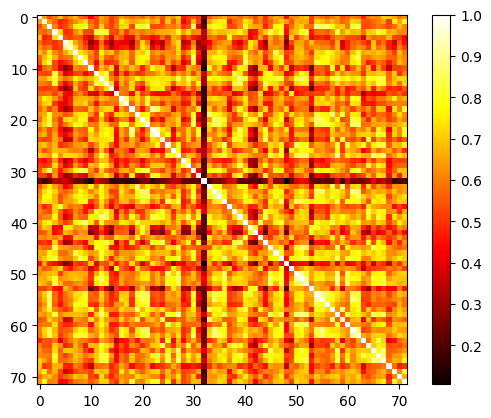

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(weight_M, cmap='hot')
plt.colorbar()
plt.show()


In [ ]:
from numpy.linalg import eigh
# Compute all eigenvalues/eigenvectors (symmetric so use eigh)
eigvals, eigvecs = eigh(Lsym)
# Sort eigenvalues ascending and take first k nontrivial eigenvectors
print("\nEigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)


Eigenvalues:
 [-3.78141684e-16  8.77784031e-01  9.13061739e-01  9.48333794e-01
  9.57690361e-01  9.64626354e-01  9.68338385e-01  9.72293963e-01
  9.77977820e-01  9.79994447e-01  9.83282671e-01  9.85703792e-01
  9.87674359e-01  9.89063354e-01  9.89678471e-01  9.90285555e-01
  9.91522523e-01  9.92173932e-01  9.92454779e-01  9.92723318e-01
  9.93336520e-01  9.93756672e-01  9.93794156e-01  9.94343957e-01
  9.94667427e-01  9.95131665e-01  9.95383772e-01  9.95602690e-01
  9.95702107e-01  9.95977787e-01  9.96363667e-01  9.96497155e-01
  9.96696923e-01  9.96768802e-01  9.97127405e-01  9.97342499e-01
  9.97419097e-01  9.97512753e-01  9.97626616e-01  9.97749137e-01
  9.97876250e-01  9.98054349e-01  9.98143548e-01  9.98227936e-01
  9.98259097e-01  9.98327528e-01  9.98340419e-01  9.98543855e-01
  9.98591121e-01  9.98647265e-01  9.98701880e-01  9.98766944e-01
  9.98836641e-01  9.98909566e-01  9.98977867e-01  9.99037061e-01
  9.99072753e-01  9.99120537e-01  9.99145329e-01  9.99215857e-01
  9.992574

In [ ]:
#First nontrivial eigenvector (Fiedler vector) = best 2-way separation
#fielder is a scalar for each node, f(xi)=scalar for one mouse on the original graph (constructed from Weight matrix not seen)
#simliar scalars=cluster
#Fiedler vector reduces each node to a single number along the “best cut direction.”
#It’s like a 1D embedding of the graph: nodes that are similar in connectivity are mapped close together; nodes that are weakly connected are mapped far apart.

#SO JUST TAKE THE FIEDLER VECTOR CORRESPONDING TO 2 TO LOOK AT CLUSTERS
Fvec2=eigvecs[1]
#clusters are separated by sign, so about 0. Could also use median if vector isnt exactly 'balanced'
#You could also scale the vector or look at magnitude to see “strength of membership,” but for simple 2-way clustering, sign is enough.
#mine is slightly skewed, median prolly better if i want to do more clusters?

[ 1  2  5  7  8 11 12 16 20 21 22 23 24 25 28 33 34 39 40 41 43 44 45 47
 48 49 52 53 54 55 56 57 60 63 64 68 71]
[ 0  3  4  6  9 10 13 14 15 17 18 19 26 27 29 30 31 32 35 36 37 38 42 46
 50 51 58 59 61 62 65 66 67 69 70]


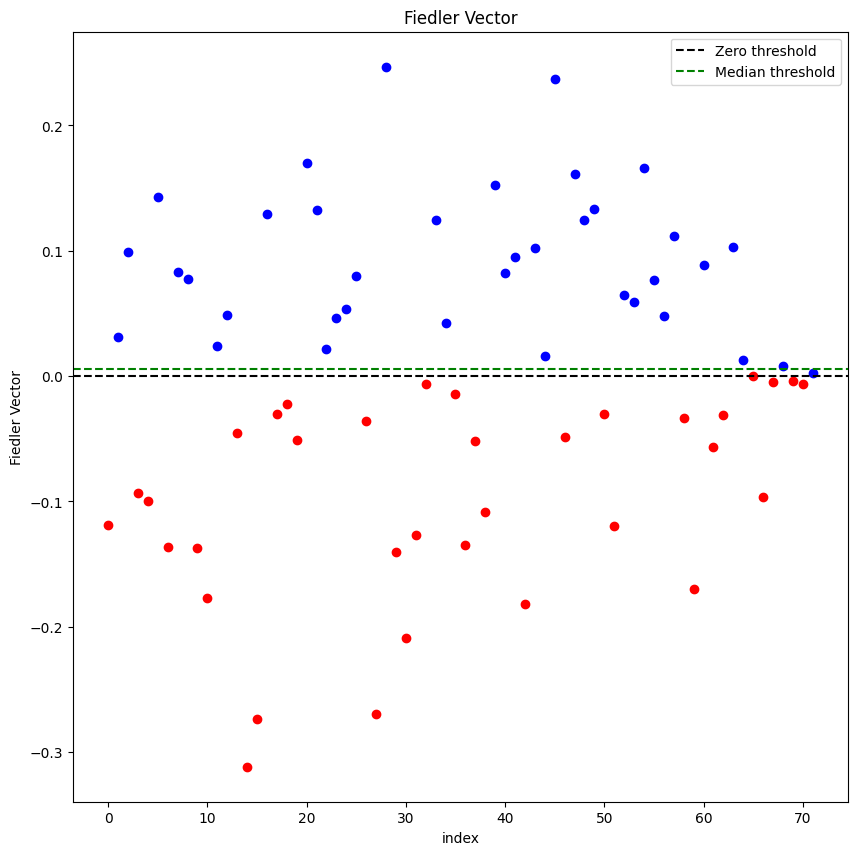

In [ ]:
type(Fvec2)
positive = Fvec2[Fvec2>0]
negative = Fvec2[Fvec2<0]
p_index = np.where(Fvec2>0)[0]
n_index = np.where(Fvec2<0)[0]
print(p_index)
print(n_index)

import matplotlib.pyplot as plt
#plt.hist(Fvec2) #here I can see skewness clearly
plt.show()
plt.figure(figsize=(10,10))
#plt.scatter(x,y)
plt.scatter(p_index, positive, c='blue')
plt.scatter(n_index, negative, c='red')
plt.xlabel("index")
plt.ylabel("Fiedler Vector")
plt.title("Fiedler Vector")


#GPT:Median; theyre both about the same it seems
plt.axhline(0, color='black', linestyle='--', label='Zero threshold')
median_val = np.median(Fvec2)
plt.axhline(median_val, color='green', linestyle='--', label='Median threshold')
plt.legend()

plt.show()

In [ ]:
# Get Genotype and MouseID from the original data
Y = data[['Genotype', 'MouseID']].copy()

# Remove the _\d+ from MouseID
Y['MouseID'] = Y['MouseID'].str.replace(r'_\d+', '', regex=True)

# Group by MouseID and get the first genotype for each mouse
Y_grouped = Y.groupby('MouseID', as_index=False).first() #this just grabs the first consistent value, it needs to have a way to compress and mean() doesn't make sense

print(Y_grouped)

# Replace string labels with numerical ones
Y_grouped['Genotype'].replace('Control', 0, inplace=True)
Y_grouped['Genotype'].replace('Ts65Dn', 1, inplace=True)

   MouseID Genotype
0    18899   Ts65Dn
1      293   Ts65Dn
2      294  Control
3      309  Control
4      311  Control
..     ...      ...
67  50810E   Ts65Dn
68  50810F  Control
69   J1291   Ts65Dn
70   J2292  Control
71   J3295   Ts65Dn

[72 rows x 2 columns]


/tmp/ipython-input-2559775574.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Y_grouped['Genotype'].replace('Control', 0, inplace=True)
/tmp/ipython-input-2559775574.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
print(Y_grouped.head())
Y_labels = Y_grouped['Genotype']
print(Y_labels.head())

  MouseID  Genotype
0   18899         1
1     293         1
2     294         0
3     309         0
4     311         0
0    1
1    1
2    0
3    0
4    0
Name: Genotype, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

cluster_assignments = np.where(Fvec2 > 0, 1, 0) #Express clusters numerically if >0, call it 0 for control(could be opposite order)

ari = adjusted_rand_score(Y_labels, cluster_assignments)
print("Adjusted Rand Index (ARI):", ari)
cm= confusion_matrix(Y_labels, cluster_assignments)
print(cm) #flip labels in cluster see if taht does anything

#CM takes y_true and y_predicted:
 #[[19 19]
 #[18 16]] # THIS IS ~50% ACCURACY

 #sum of all is 72=total, and correct is diagonal
 #need to learn the details of the confusion matrix

Adjusted Rand Index (ARI): 0.02411444625564742
[[22 16]
 [13 21]]


In [ ]:
#Compare to import
from sklearn.cluster import SpectralClustering

n_clusters = 2  # or however many clusters you want

spectral = SpectralClustering(
    n_clusters=n_clusters,   # number of clusters to find
    affinity='rbf',          # Gaussian kernel numerator
    gamma=.0033,               # width/DENOMAINATOR AS MULTIPLICATION of the RBF kernel, b/c my sigma was 12 ish the gamma would be 0.0033
    assign_labels='kmeans',  # how to assign final labels from the spectral embedding
    random_state=42          # ensures reproducibility
)

# Fit the model and predict labels
Y_pred = spectral.fit_predict(X_avg_scaled)  # X is your preprocessed data

# Evaluate clustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score

print("Confusion matrix:")
print(confusion_matrix(Y_labels, Y_pred))  # y_true = true class labels
print("Adjusted Rand Index (ARI):", adjusted_rand_score(Y_labels, Y_pred))


Confusion matrix:
[[27 11]
 [20 14]]
Adjusted Rand Index (ARI): 0.006354581746421113


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
distances = pairwise_distances(X_avg_scaled)
median_dist = np.median(distances)
gamma = 1 / (2 * median_dist**2)


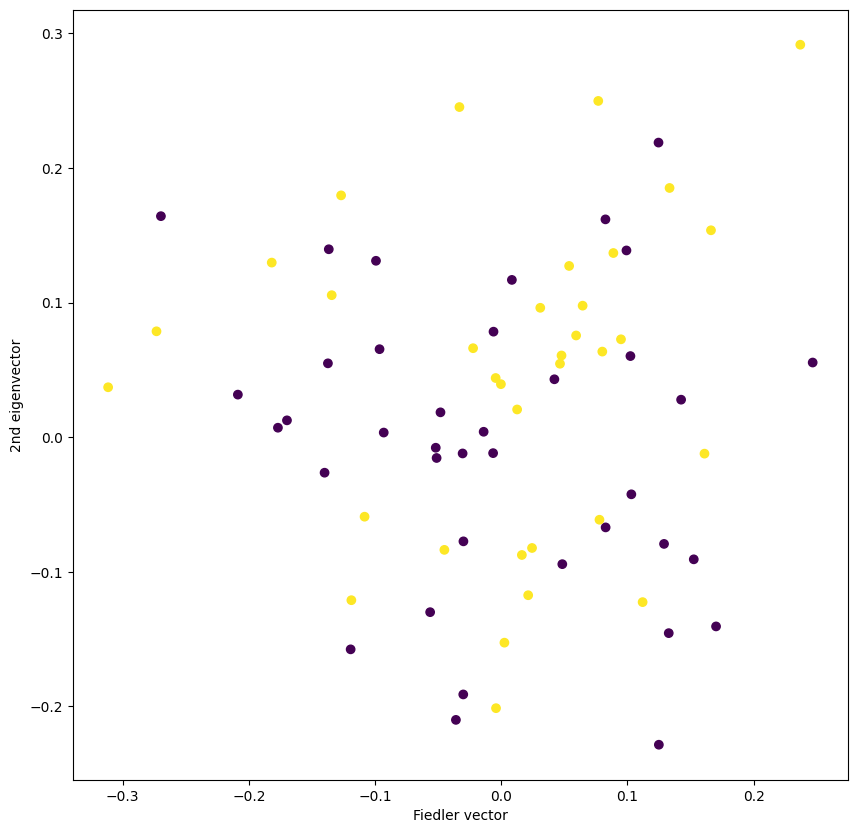

In [ ]:
import matplotlib.pyplot as plt
Fvec3 = eigvecs[2]
plt.figure(figsize=(10,10))
plt.scatter(Fvec2, Fvec3, c=Y_labels)
plt.xlabel("Fiedler vector")
plt.ylabel("2nd eigenvector")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

X_spectral = eigvecs[:, 1:3]  # first 2 non-trivial
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_spectral)
labels = kmeans.labels_


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# 1. Compute RBF affinity matrix
distances = pairwise_distances(X_avg_scaled)
median_dist = np.median(distances)
gamma = 1 / (2 * median_dist**2)

W = np.exp(-gamma * distances**2)

# 2. Degree matrix
D = np.diag(W.sum(axis=1))

# 3. Normalized symmetric Laplacian
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
Lsym = np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt

# 4. Eigen decomposition
eigvals, eigvecs = np.linalg.eigh(Lsym)

# 5. Take first k non-trivial eigenvectors (skip the zero eigenvalue)
k = 2
X_spectral = eigvecs[:, 1:k+1]  # shape (n_samples, k)

# 6. Optional: normalize rows (common practice)
X_spectral = X_spectral / np.linalg.norm(X_spectral, axis=1, keepdims=True)

# 7. Run k-means
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_spectral)
labels = kmeans.labels_

# 8. Evaluate
ari = adjusted_rand_score(Y_labels, labels)
cm = confusion_matrix(Y_labels, labels)

print("Adjusted Rand Index (ARI):", ari)
print("Confusion matrix:\n", cm)


Adjusted Rand Index (ARI): 0.005332366632660684
Confusion matrix:
 [[17 21]
 [20 14]]


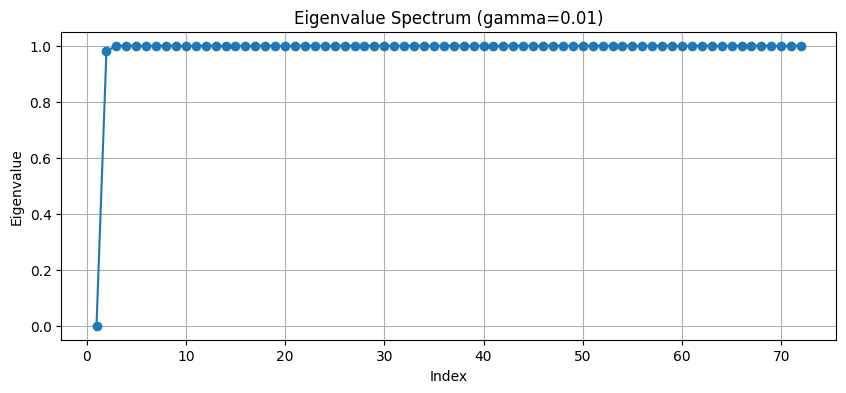

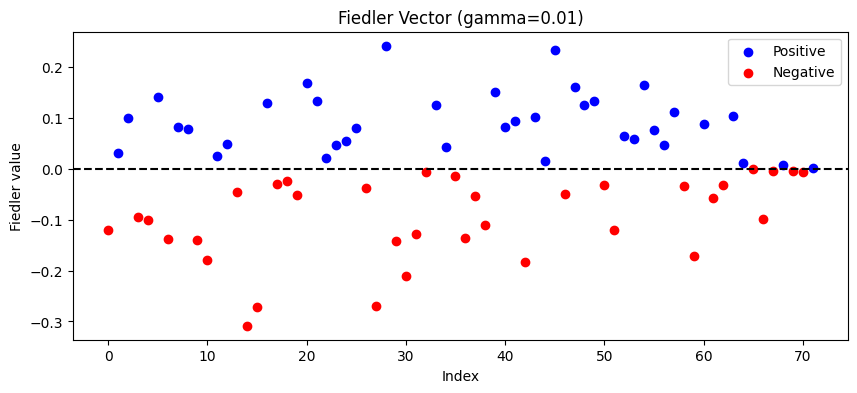

Gamma=0.01 -> Gap between 2nd and 3rd eigenvalue: 0.0193


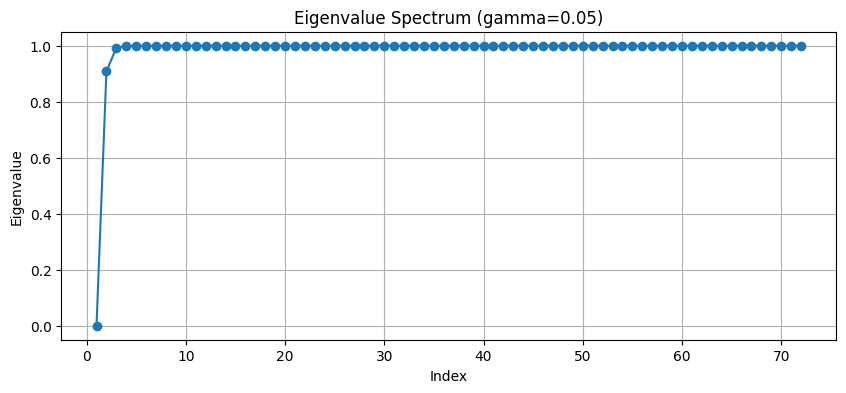

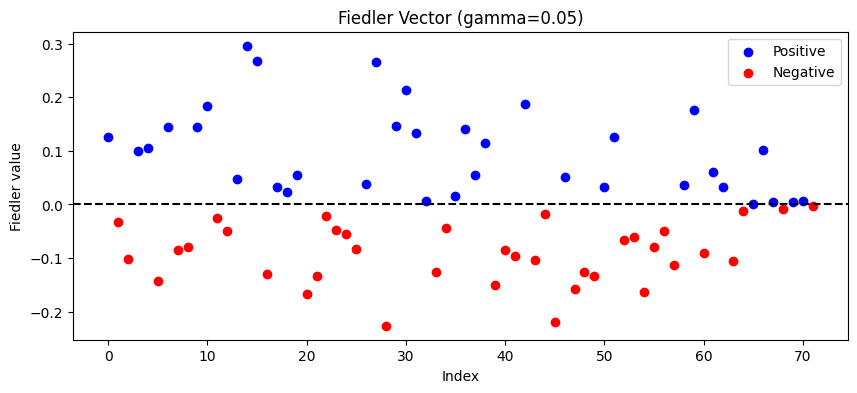

Gamma=0.05 -> Gap between 2nd and 3rd eigenvalue: 0.0844


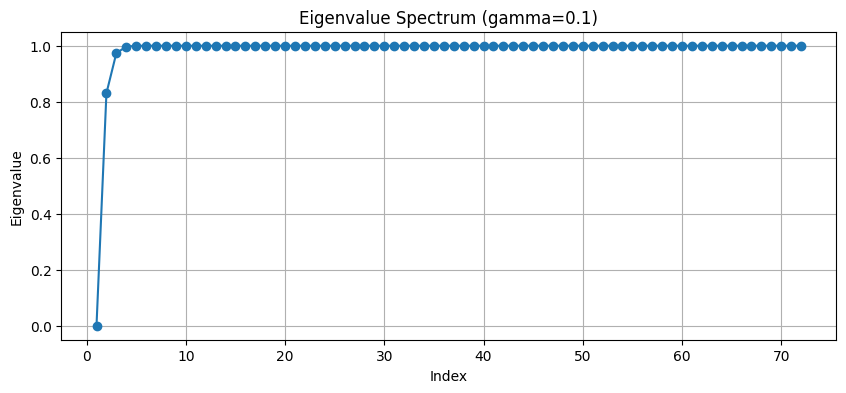

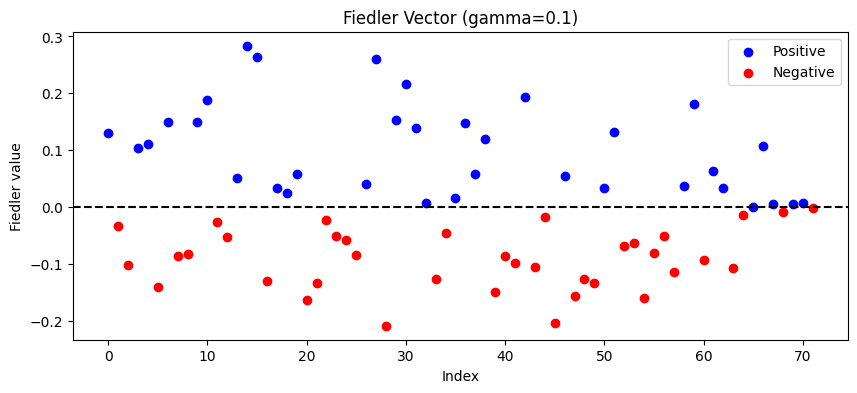

Gamma=0.1 -> Gap between 2nd and 3rd eigenvalue: 0.1433


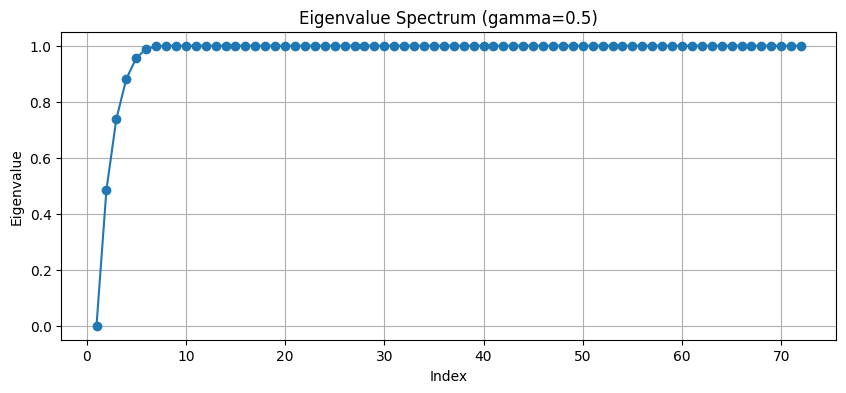

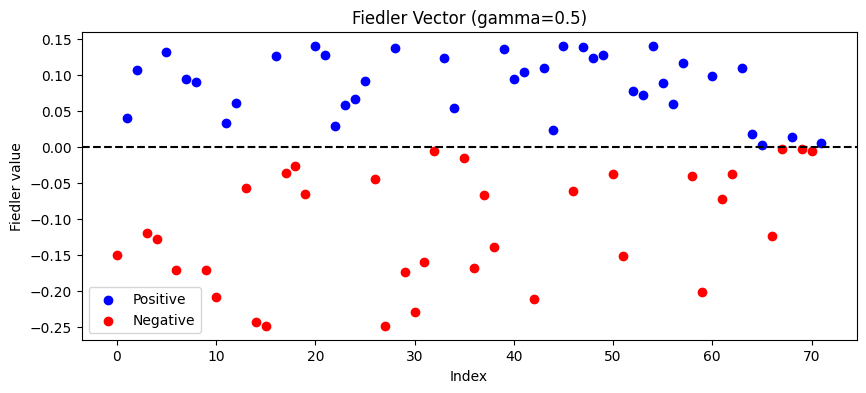

Gamma=0.5 -> Gap between 2nd and 3rd eigenvalue: 0.2534


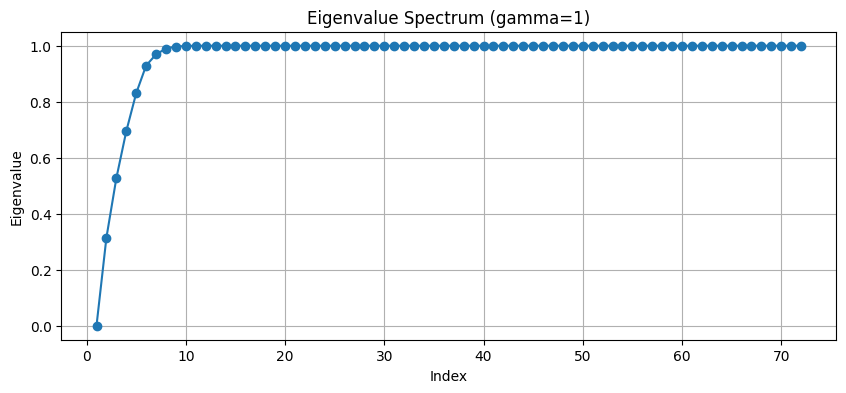

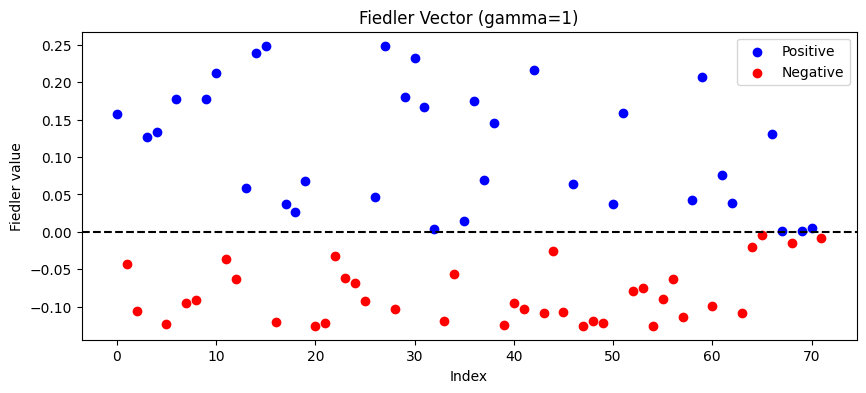

Gamma=1 -> Gap between 2nd and 3rd eigenvalue: 0.2122


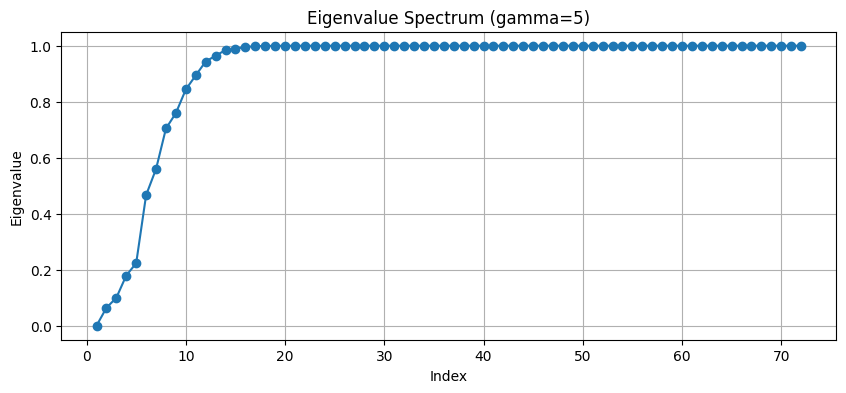

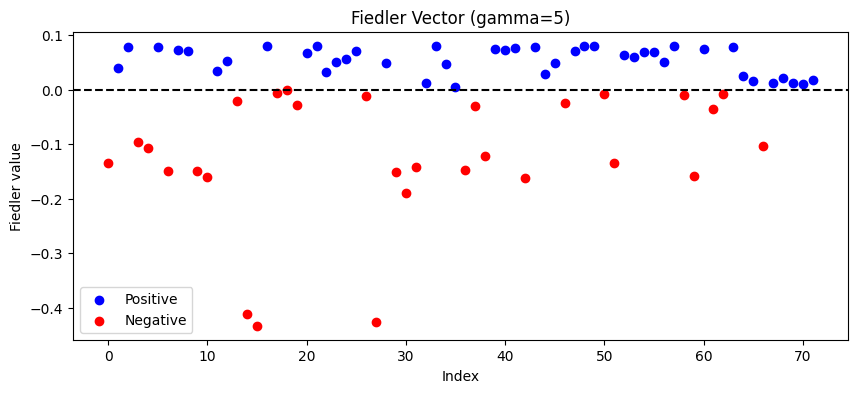

Gamma=5 -> Gap between 2nd and 3rd eigenvalue: 0.0360


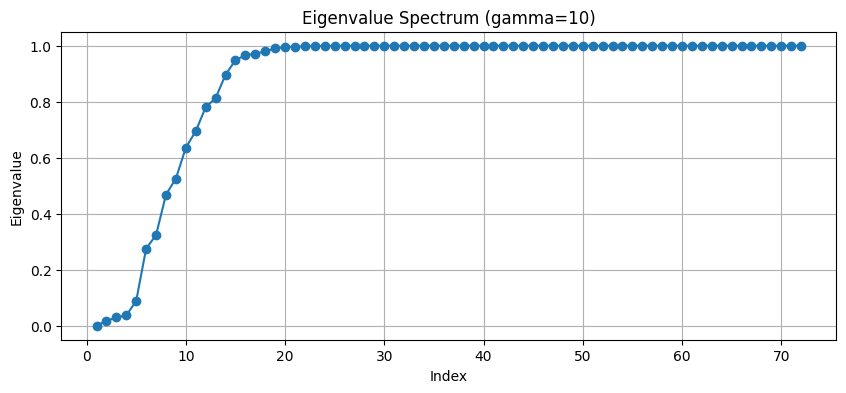

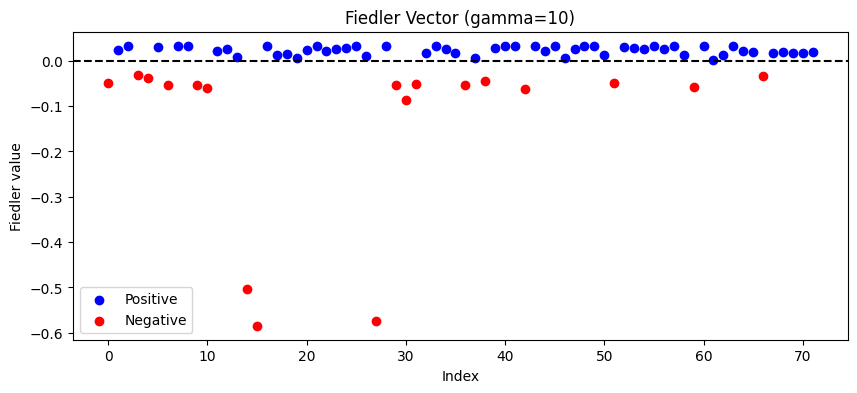

Gamma=10 -> Gap between 2nd and 3rd eigenvalue: 0.0123


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import StandardScaler

# Example: Fvec2 is your preprocessed data
X = Fvec2.reshape(-1, 1)  # ensure 2D for affinity computation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of gammas (1/(2*sigma^2))
gammas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

for gamma in gammas:
    # Compute RBF affinity matrix
    A = rbf_kernel(X_scaled, gamma=gamma)

    # Degree matrix
    D = np.diag(A.sum(axis=1))

    # Normalized Laplacian: L_sym = I - D^(-1/2) A D^(-1/2)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(A.sum(axis=1) + 1e-10))
    L_sym = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt

    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(L_sym)

    # Fiedler vector (2nd smallest eigenvector)
    fiedler_vector = eigvecs[:, 1]

    # Plot eigenvalue spectrum
    plt.figure(figsize=(10,4))
    plt.plot(np.arange(1, len(eigvals)+1), eigvals, marker='o')
    plt.title(f"Eigenvalue Spectrum (gamma={gamma})")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")
    plt.grid(True)
    plt.show()

    # Plot Fiedler vector
    plt.figure(figsize=(10,4))
    pos_idx = np.where(fiedler_vector > 0)[0]
    neg_idx = np.where(fiedler_vector < 0)[0]
    plt.scatter(pos_idx, fiedler_vector[pos_idx], c='blue', label='Positive')
    plt.scatter(neg_idx, fiedler_vector[neg_idx], c='red', label='Negative')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f"Fiedler Vector (gamma={gamma})")
    plt.xlabel("Index")
    plt.ylabel("Fiedler value")
    plt.legend()
    plt.show()

    print(f"Gamma={gamma} -> Gap between 2nd and 3rd eigenvalue: {eigvals[2] - eigvals[1]:.4f}")
    #best_gamma = 0.5
#best_k = 2


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Ground truth labels, if you have them
# Replace with your actual labels array

# Fiedler vector partition
fiedler_vector = eigvecs[:, 1]
fiedler_labels = (fiedler_vector >= 0).astype(int)

# ARI for Fiedler partition
ari_fiedler = adjusted_rand_score(Y_labels, fiedler_labels)

# ARI for sklearn spectral clustering
ari_spectral = adjusted_rand_score(Y_labels, labels)

print(f"ARI (Fiedler split): {ari_fiedler:.4f}")
print(f"ARI (Spectral clustering): {ari_spectral:.4f}")


ARI (Fiedler split): -0.0083
ARI (Spectral clustering): 0.0053


In [ ]:
#DO From scratch, this time X.fillna(mean), remove outlier mouse (it's a trisomy 23) data, they normalized I standardized can try that as well (-min/max-min vs -mean/std)